In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/kaggle/audio_emotion.zip

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

In [3]:
import os,sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv1D,MaxPooling1D,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import librosa
import librosa.display
import random
import warnings
from scipy.io import wavfile
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [4]:

# Paths to the datasets
crema = '/content/Crema'
savee = '/content/Savee'
tess = '/content/Tess'
#code to extract_features from audio using signal processing (mfcc)
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None
#to get emotions from filenames
def get_emotions(filename):
    emotion = filename.split('_')[2]
    return emotion


# Define the emotion labels (adjust as per your dataset)
emotion_labels = {'NEU': 0, 'HAP': 1, 'SAD': 2, 'FEA': 3, 'DIS': 4, 'ANG': 5}

features = []
labels = []

for file_name in os.listdir(crema):
    if file_name.endswith('.wav'):
        file_path = os.path.join(crema, file_name)
        print(f"Processing file: {file_path}")
        mfccs = extract_features(file_path)
        if mfccs is not None:
            emotion = get_emotions(file_name)
            if emotion in emotion_labels:
                features.append(mfccs)
                labels.append(emotion_labels[emotion])
# Ensure there are no NaNs or infinities in your data





Streaming output truncated to the last 5000 lines.
Processing file: /content/Crema/1030_WSI_SAD_XX.wav
Processing file: /content/Crema/1080_IEO_HAP_HI.wav
Processing file: /content/Crema/1056_IEO_SAD_HI.wav
Processing file: /content/Crema/1066_ITH_SAD_XX.wav
Processing file: /content/Crema/1041_TSI_HAP_XX.wav
Processing file: /content/Crema/1050_ITH_SAD_XX.wav
Processing file: /content/Crema/1001_MTI_FEA_XX.wav
Processing file: /content/Crema/1046_WSI_HAP_XX.wav
Processing file: /content/Crema/1011_IWW_SAD_XX.wav
Processing file: /content/Crema/1020_IWL_ANG_XX.wav
Processing file: /content/Crema/1034_MTI_DIS_XX.wav
Processing file: /content/Crema/1078_MTI_DIS_XX.wav
Processing file: /content/Crema/1061_IWL_FEA_XX.wav
Processing file: /content/Crema/1037_IWL_NEU_XX.wav
Processing file: /content/Crema/1060_IWL_ANG_XX.wav
Processing file: /content/Crema/1032_DFA_DIS_XX.wav
Processing file: /content/Crema/1003_IEO_SAD_MD.wav
Processing file: /content/Crema/1077_IEO_SAD_MD.wav
Processing fi

In [5]:
labels = pd.Series(labels)
features = pd.DataFrame(features)
#print the extracted features
print(features)
audio_df = pd.concat([labels,features], axis=1)
print(audio_df)
x = audio_df.iloc[:, 1:].values
y = audio_df.iloc[:, 0].values

              0           1          2          3          4          5   \
0    -404.688293  108.988136  39.625183  27.653482  12.055614   4.842228   
1    -345.342010  113.156212  32.826771  19.474728  -0.083564   0.424094   
2    -269.785248  117.218567  24.988207  12.897598  -5.154659 -14.211415   
3    -378.042786   69.722725  54.935093  22.636391  10.179049   8.839602   
4    -407.464966  105.232109  29.051657  25.513851  13.075169   4.791447   
...          ...         ...        ...        ...        ...        ...   
7437 -392.035248  110.153267  32.352509  18.799259  11.667946   6.459688   
7438 -335.619019   83.002586  50.202522  22.084244  13.937126   5.028184   
7439 -407.694183  111.020447  46.643726  24.068859   8.252005   4.494867   
7440 -398.883087  105.327271  44.426487  30.778292  10.442058   3.207194   
7441 -399.065460  122.671989  42.738144  22.262358   8.213824   2.378514   

            6          7         8         9   ...        30        31  \
0     3.43249

<Axes: xlabel='0'>

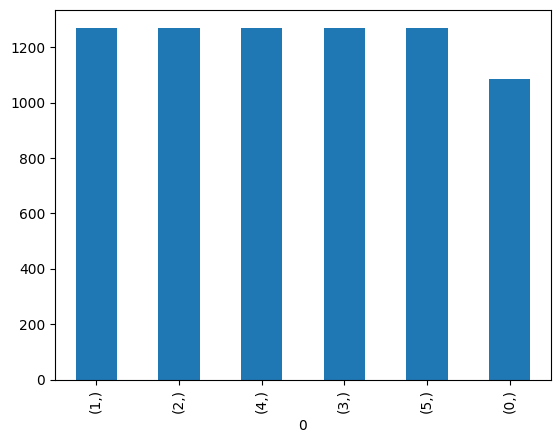

In [6]:
ls = pd.DataFrame(labels)
ls.value_counts()
ls.value_counts().plot(kind='bar')

In [7]:
y = to_categorical(y)
print(f"One-hot encoded labels shape: {y.shape}")
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure there are no NaNs or infinities in your data
x_train = np.nan_to_num(x_train, nan=np.mean(x_train, axis=0))
x_test = np.nan_to_num(x_test, nan=np.mean(x_test, axis=0))

# Normalize or standardize your data if needed
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Expand dimensions to fit Conv1D input shape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


One-hot encoded labels shape: (7442, 6)


In [8]:
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Labels shape: {y_train.shape}")
print(f"Labels shape: {y_test.shape}")

Training data shape: (5953, 40, 1)
Testing data shape: (1489, 40, 1)
Labels shape: (5953, 6)
Labels shape: (1489, 6)


In [9]:
audio_emotion = Sequential()
audio_emotion.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
audio_emotion.add(BatchNormalization(axis=-1))
audio_emotion.add(Conv1D(64, kernel_size=3, activation='relu'))
audio_emotion.add(BatchNormalization(axis=-1))
audio_emotion.add(Dropout(0.3))
audio_emotion.add(Flatten())  # Flatten before the Dense layers
audio_emotion.add(Dense(128, activation='relu'))
audio_emotion.add(Dropout(0.3))
audio_emotion.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=1e-4)
audio_emotion.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
audio_emotion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 36, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,934 (1.18 MB)

 Trainable params: 308,678 (1.18 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.2364 - loss: 2.3319 - val_accuracy: 0.2666 - val_loss: 1.6672
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3398 - loss: 1.8226 - val_accuracy: 0.4030 - val_loss: 1.4663
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4104 - loss: 1.5976 - val_accuracy: 0.4271 - val_loss: 1.3843
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3999 - loss: 1.5785 - val_accuracy: 0.4426 - val_loss: 1.3689
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4313 - loss: 1.4999 - val_accuracy: 0.4466 - val_loss: 1.3518
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4640 - loss: 1.4078 - val_accuracy: 0.4647 - val_loss: 1.3284
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4773 - loss: 1.3694 - val_accuracy: 0.4641 - val_loss: 1.3269
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4833 - loss: 1.3305 - val_ac

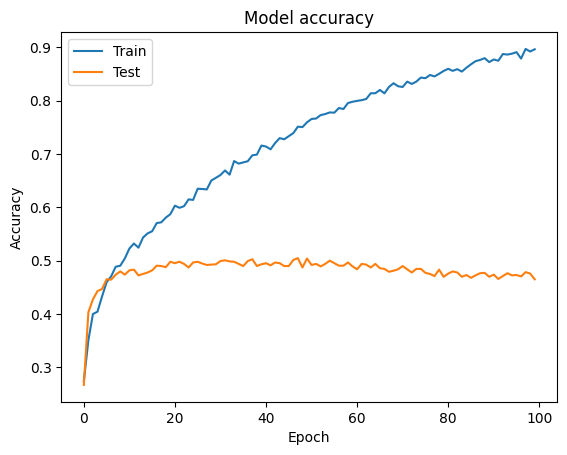

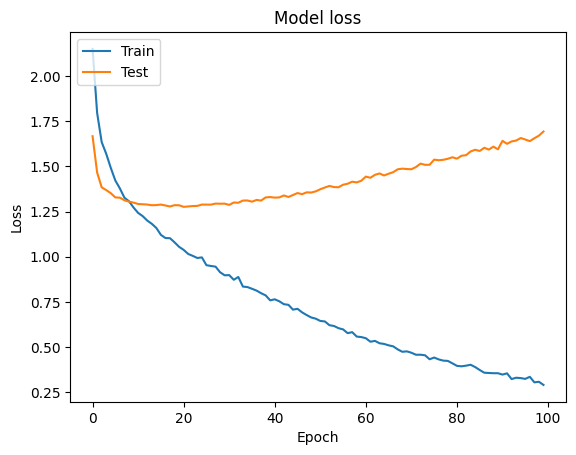

In [10]:
history = audio_emotion.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
audio_emotion.save('/content/drive/MyDrive/kaggle/audio_emotion.h5')